# Лабораторная работа № 8
## Параболические уравнения в частных производных для функций в трехмерном пространстве

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from numpy import cos, sin, pi, exp, cosh, sinh, log

In [2]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina', 'pdf')
plt.rcParams['figure.dpi'] = 100

In [5]:
def solve(method, nx, ny, nt, t_end):
    x, y, t, u, error = !echo {method} {nx} {ny} {nt} {t_end} | solver
    x = np.array(x.rstrip().split(), dtype=np.float64)
    y = np.array(y.rstrip().split(), dtype=np.float64)
    y, x = np.meshgrid(y, x)
    t = np.array(t.rstrip().split(), dtype=np.float64)
    u = np.array(u.rstrip().split(), dtype=np.float64).reshape(nt+1, nx+1, ny+1)
    error = np.array(error.rstrip().split(), dtype=np.float64).reshape(nt+1, nx+1, ny+1)
    return x, y, t, u, error

alternating_direction = 0
fractional_step = 1

In [6]:
def plot_analitical_solution(u, x0, x1, y0, y1, azim=None, samples=100):
    %matplotlib inline
    matplotlib_inline.backend_inline.set_matplotlib_formats('retina', 'pdf')
    plt.rcParams['figure.dpi'] = 100
    
    x = np.linspace(x0, x1, samples)
    y = np.linspace(y0, y1, samples)
    x, y = np.meshgrid(x, y)
    z = u(*np.c_[x.ravel(), y.ravel()].T).reshape(x.shape)
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='Spectral')
    ax.set(xlabel='x', ylabel='y')
    ax.view_init(azim=azim)
    plt.show()

In [7]:
def animate_solution(x, y, t, u, *, zlim=None, azim=None, interval=100, video=False):
    def animate(i, ax):
        ax.clear()
        ax.set_title(f't = {t[i]:.4f}')
        if zlim is not None:
            ax.set_zlim(zlim)
        return ax.plot_surface(x, y, u[i], cmap='Spectral')
            
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(azim=azim)
    anim = animation.FuncAnimation(fig, animate, frames=len(u), interval=interval, fargs=(ax, ), blit=False)
    plt.close()
    if video:
        return HTML(anim.to_html5_video())
    else:
        return HTML(anim.to_jshtml())
    
def plot_solution(x, y, t, u, epochs, *, zlim=None, azim=None):
    if isinstance(epochs, int):
        epochs = np.linspace(0, len(u)-1, epochs, dtype=int)
    else:
        epochs = np.array(epochs, dtype=int)
    
    w = min(5, int(np.ceil(np.sqrt(len(epochs)))))
    h = (len(epochs) - 1) // w + 1
    
    fig = plt.figure(figsize=(4 * w, 4 * h))
    for i, k in enumerate(epochs, 1):
        ax = fig.add_subplot(h, w, i, projection='3d')
        ax.set_title(f't = {t[k]}')
        ax.view_init(azim=azim)
        if zlim is not None:
            ax.set_zlim(zlim)
        ax.plot_surface(x, y, u[k], cmap='Spectral')
    
    fig.subplots_adjust(wspace=0.15, hspace=0.25)
    plt.show()

def plot_error(t, error):
    plt.xlabel('t')
    plt.ylabel('Error')
    plt.plot(t, np.abs(error).max(axis=(1,2)))
    plt.show()

In [8]:
!make clean && make

rm solver
g++ -std=c++17 -Wall -Wextra -pedantic solver.cpp -o solver


## Вариант 10

### Метод переменных направлений

In [9]:
x, y, t, u, error = solve(alternating_direction, 50, 50, 100, 1)

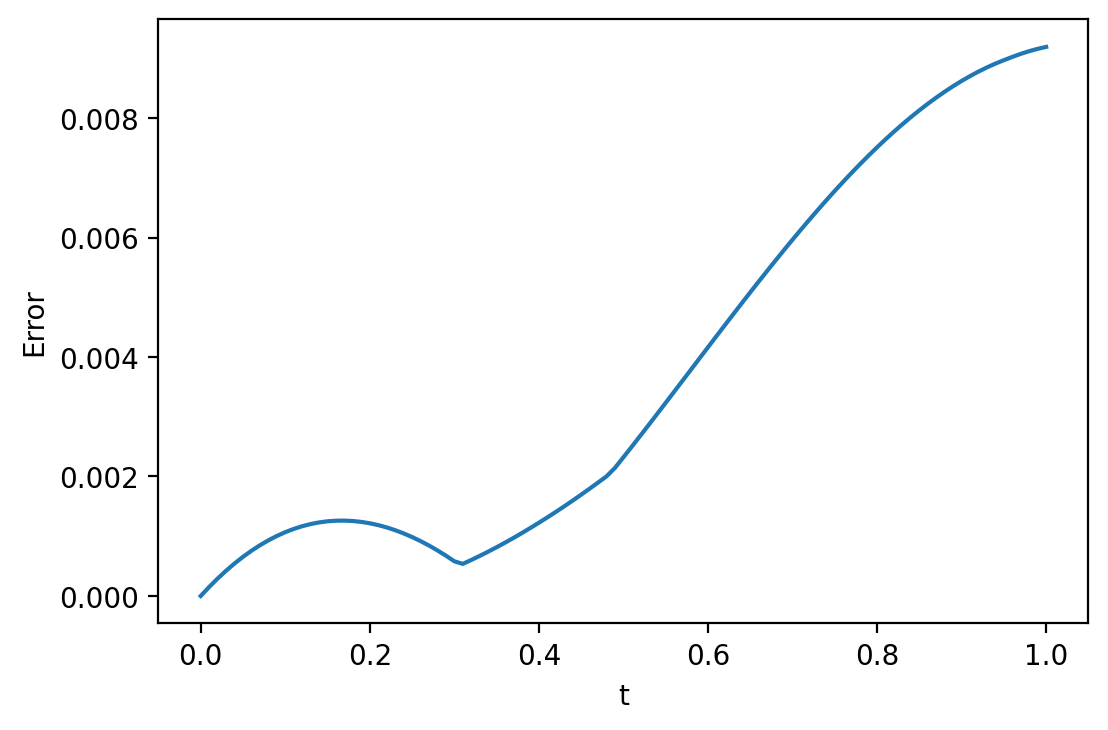

In [10]:
plot_error(t, error)

In [11]:
animate_solution(x, y, t, u, zlim=(u.min(), u.max()), interval=150, video=True)

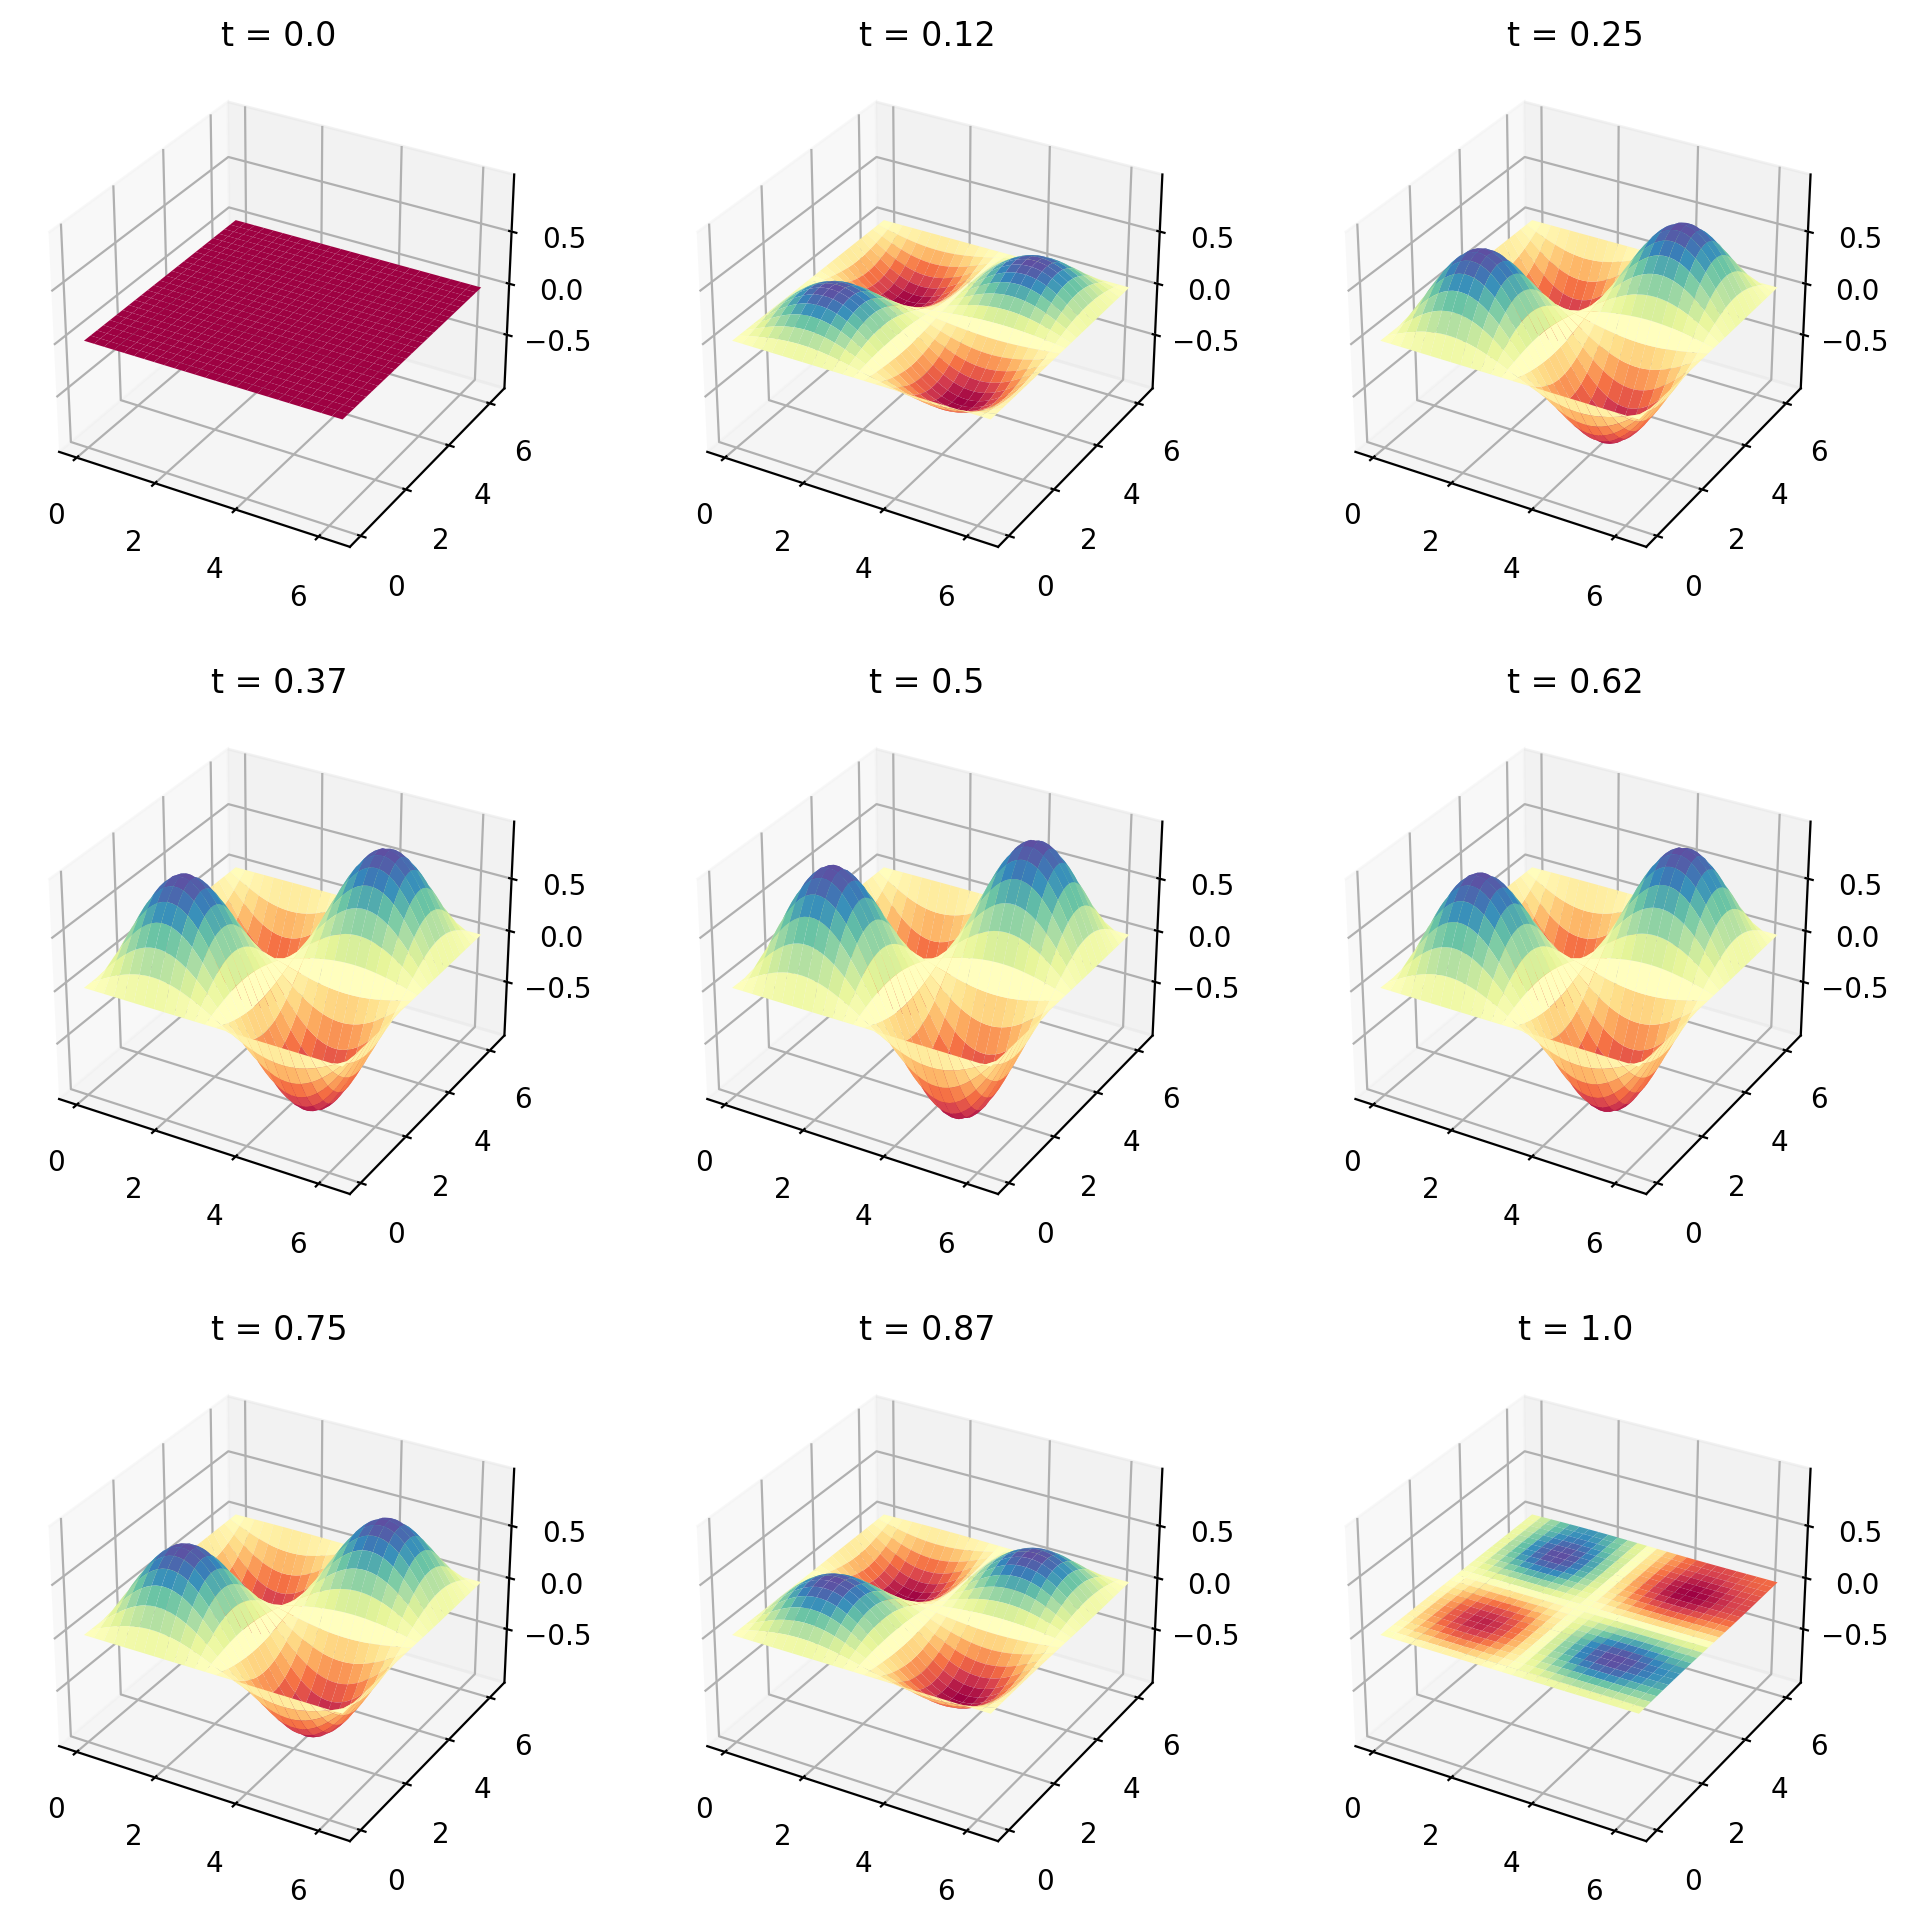

In [ ]:
plot_solution(x, y, t, u, 9, zlim=(u.min(), u.max()))

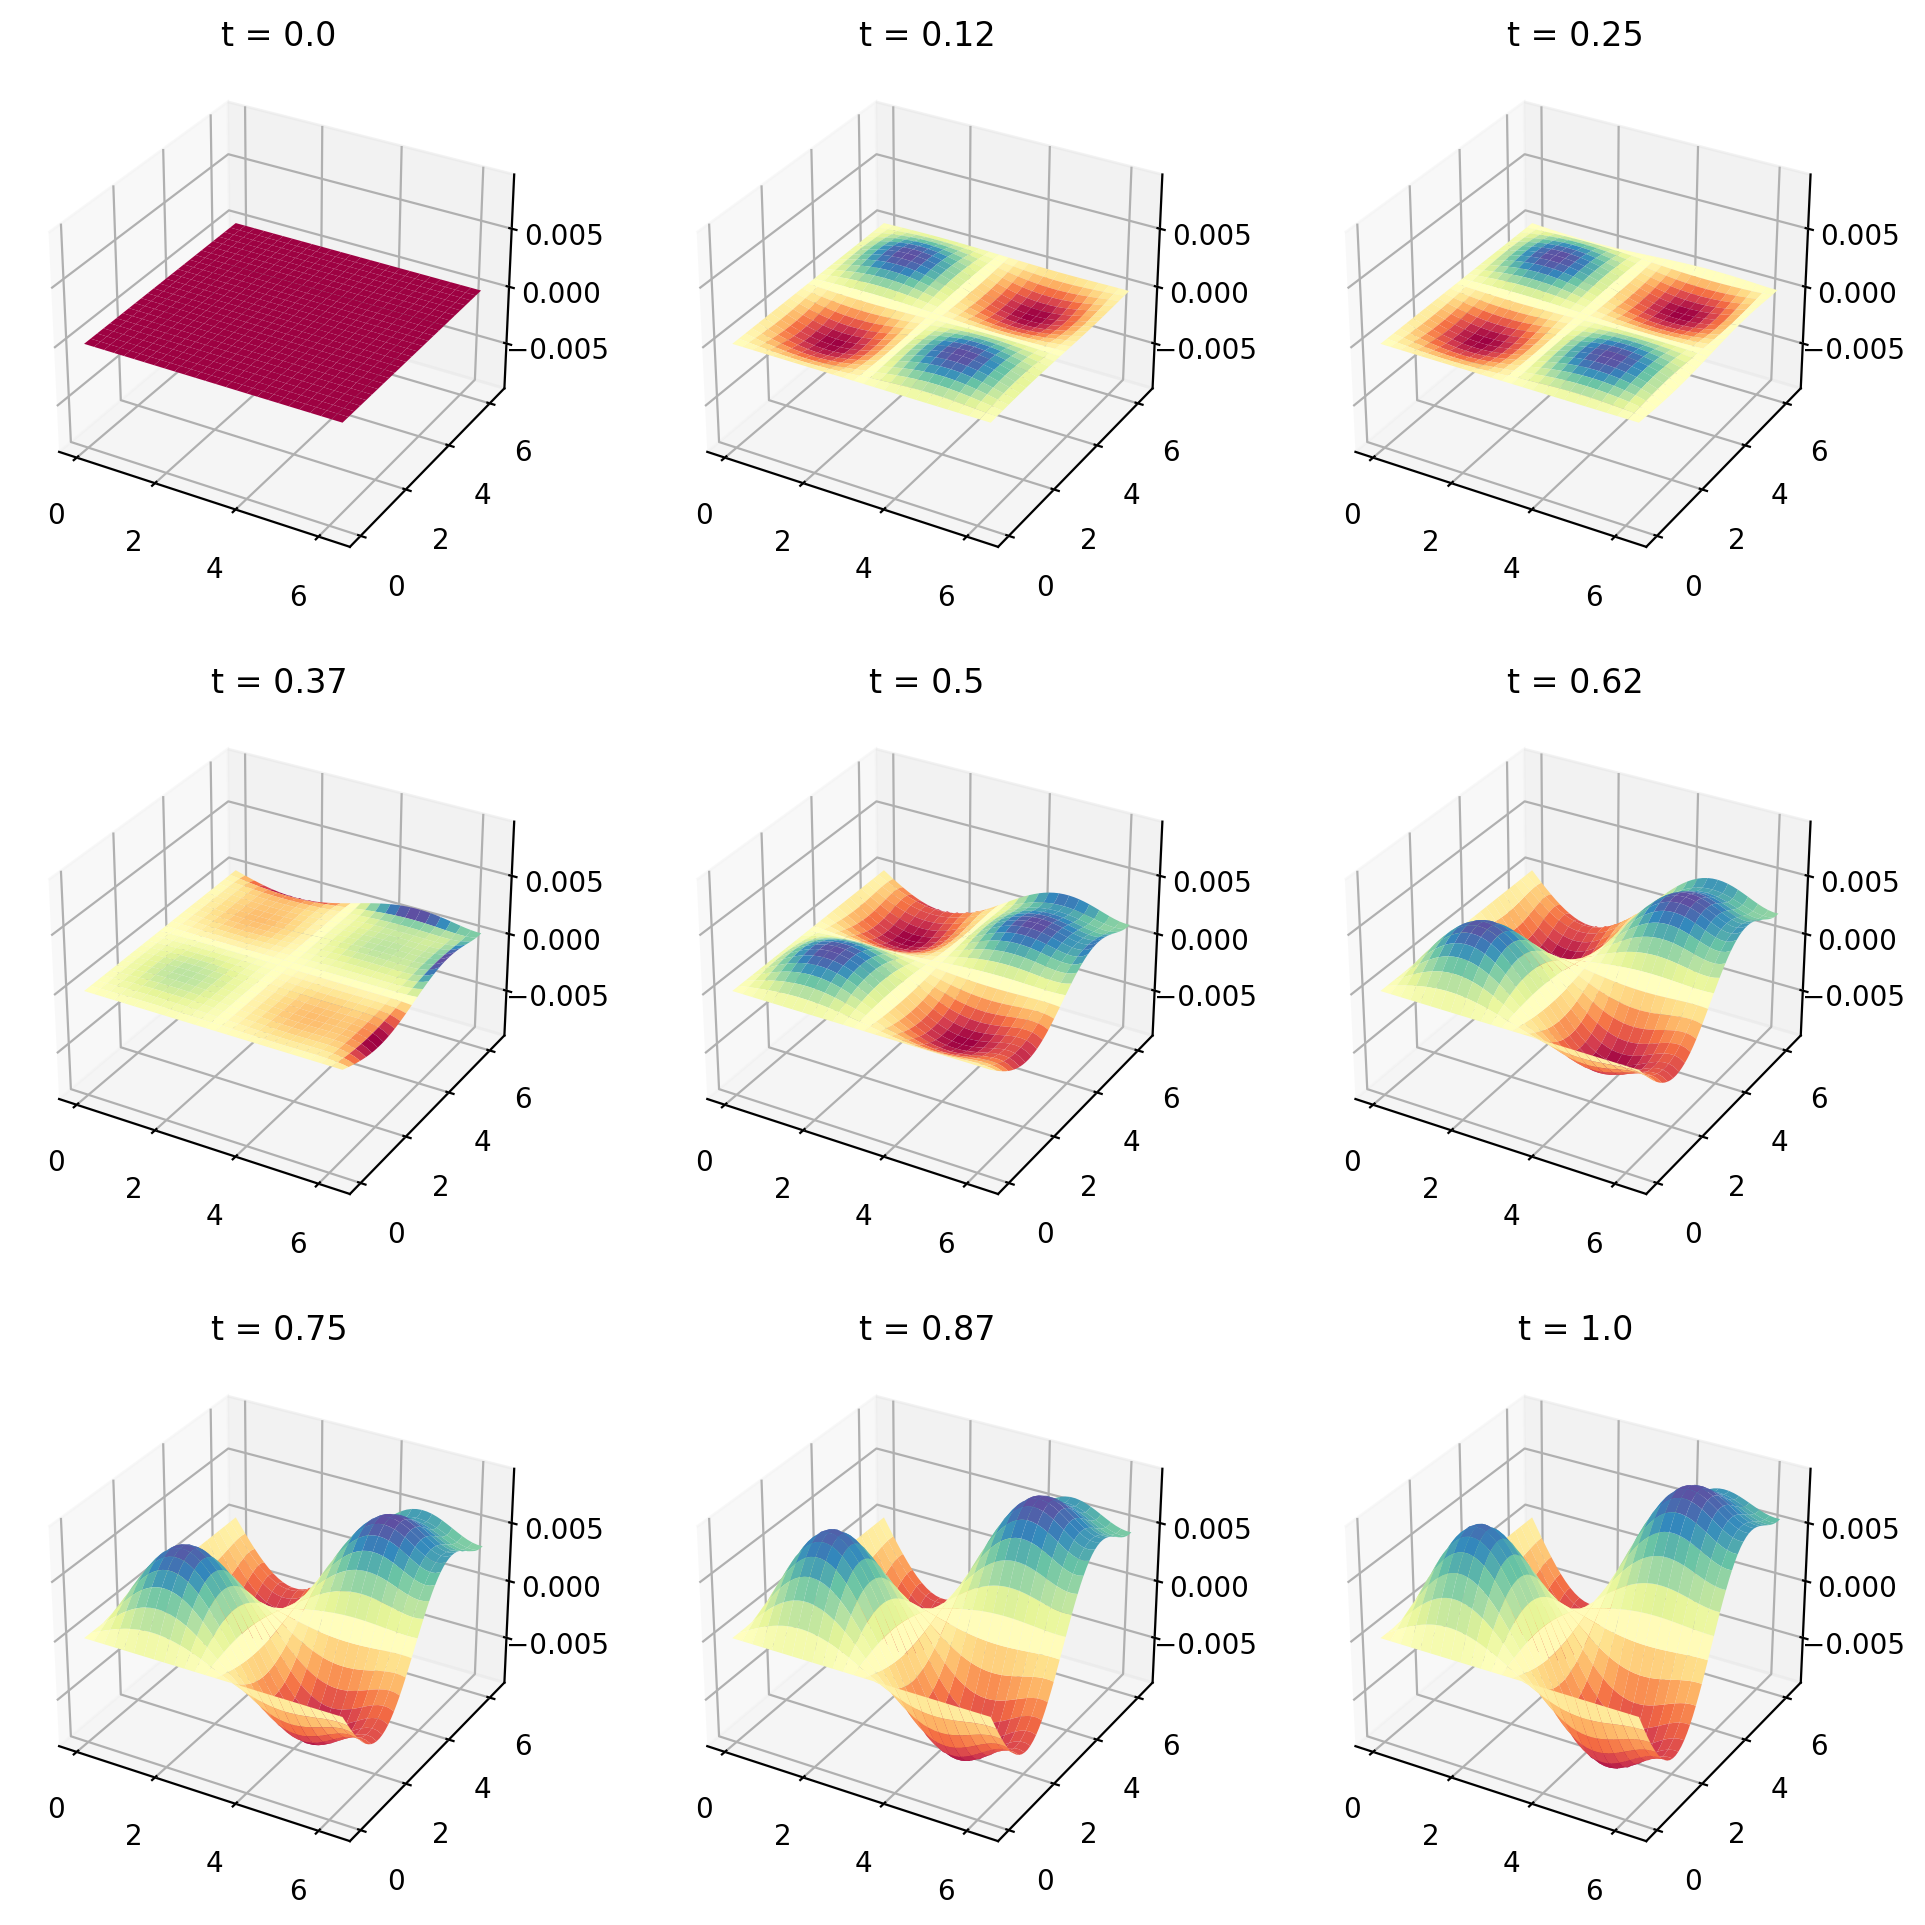

In [13]:
plot_solution(x, y, t, error, 9, zlim=(error.min(), error.max()))

### Метод переменных направлений

In [14]:
x, y, t, u, error = solve(fractional_step, 50, 50, 100, 1)

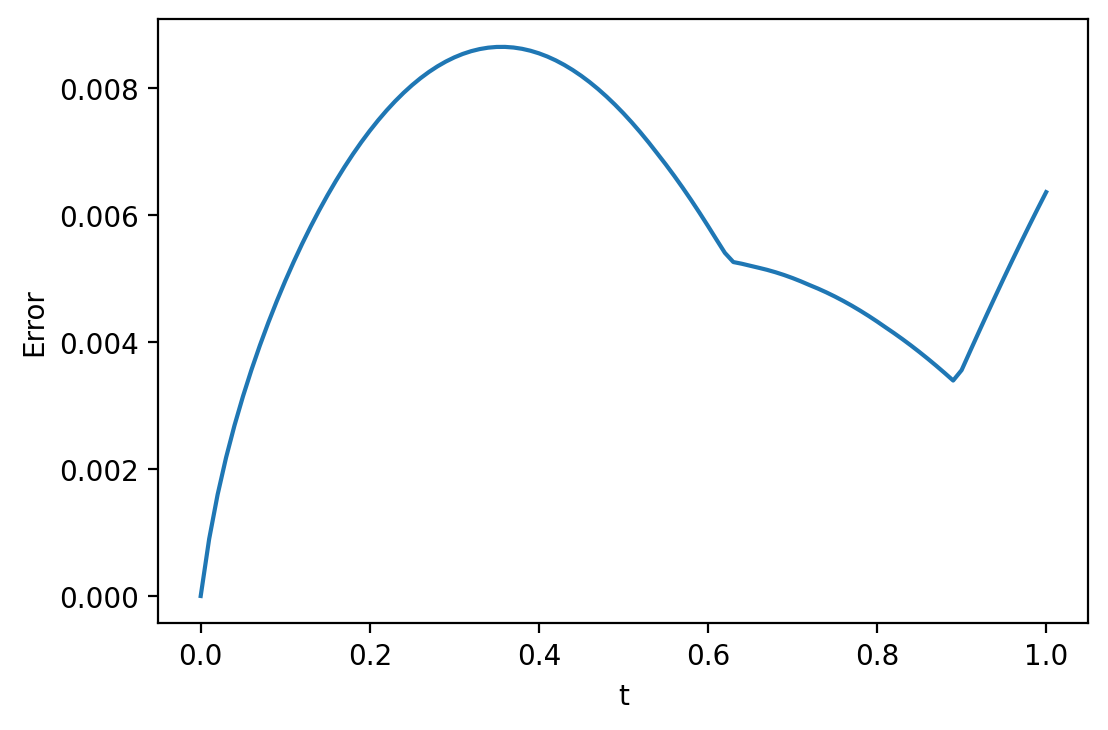

In [15]:
plot_error(t, error)

In [16]:
animate_solution(x, y, t, u, zlim=(u.min(), u.max()), interval=150, video=True)

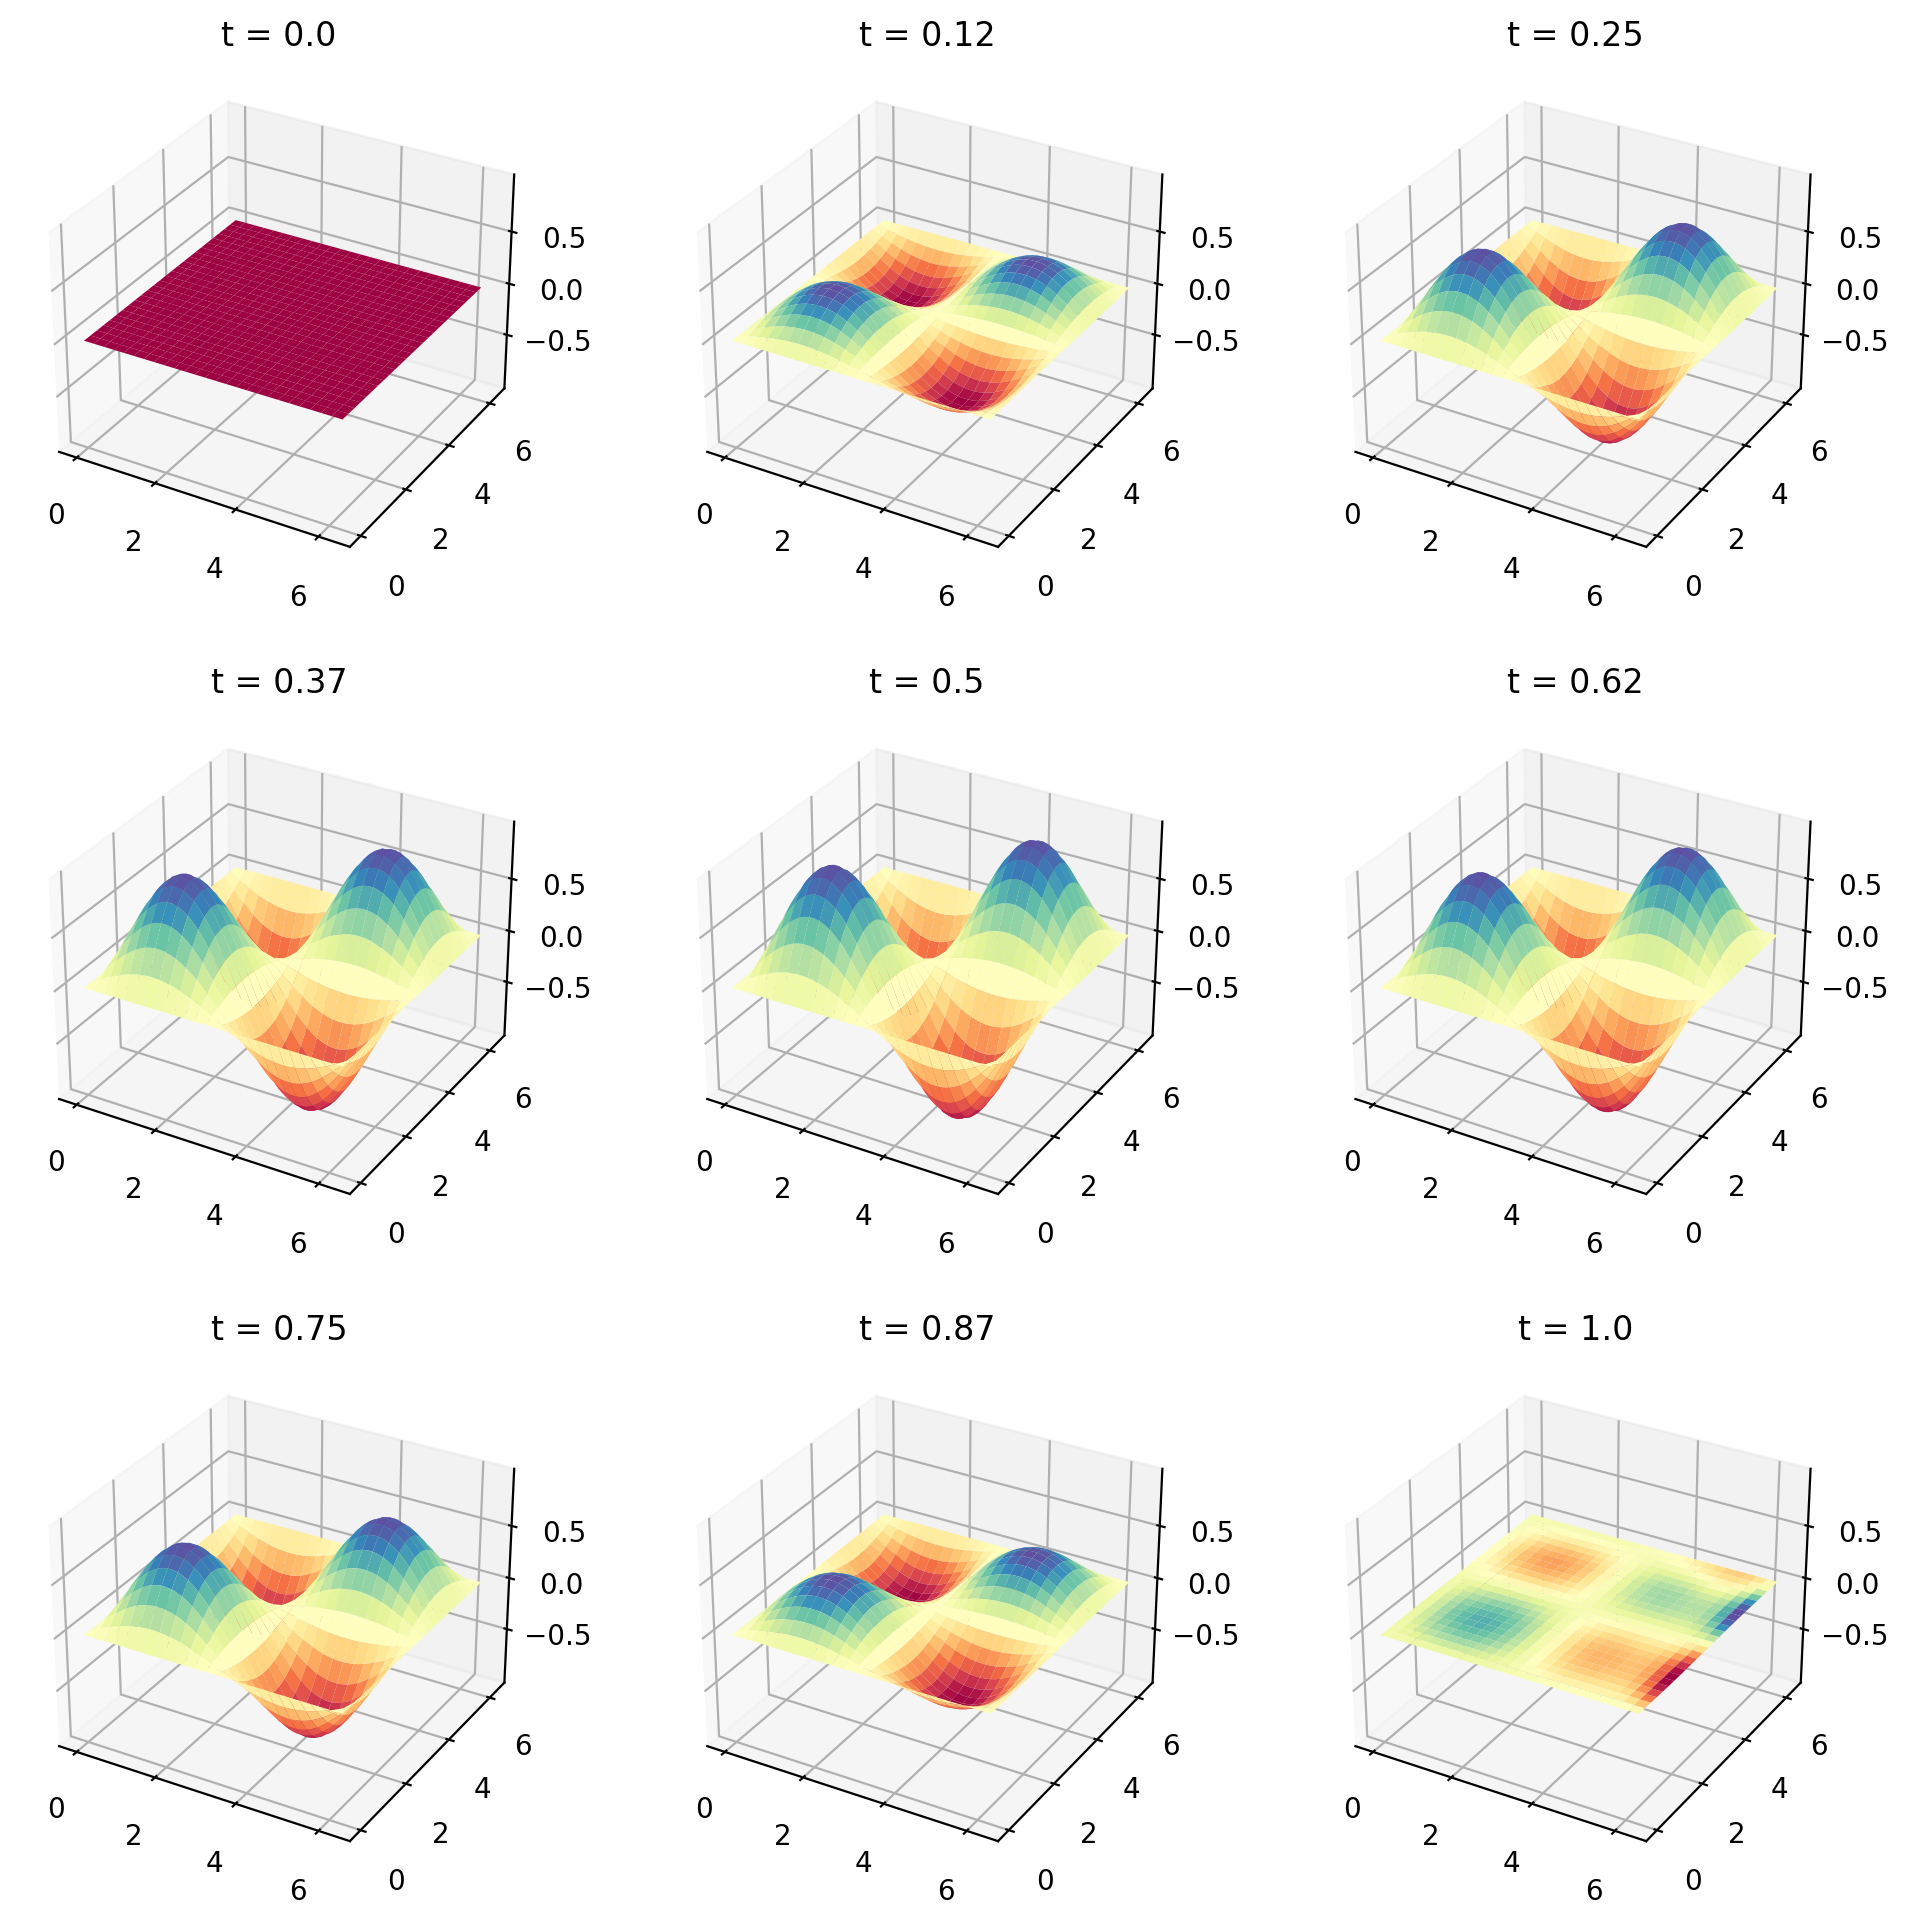

In [17]:
plot_solution(x, y, t, u, 9, zlim=(u.min(), u.max()))

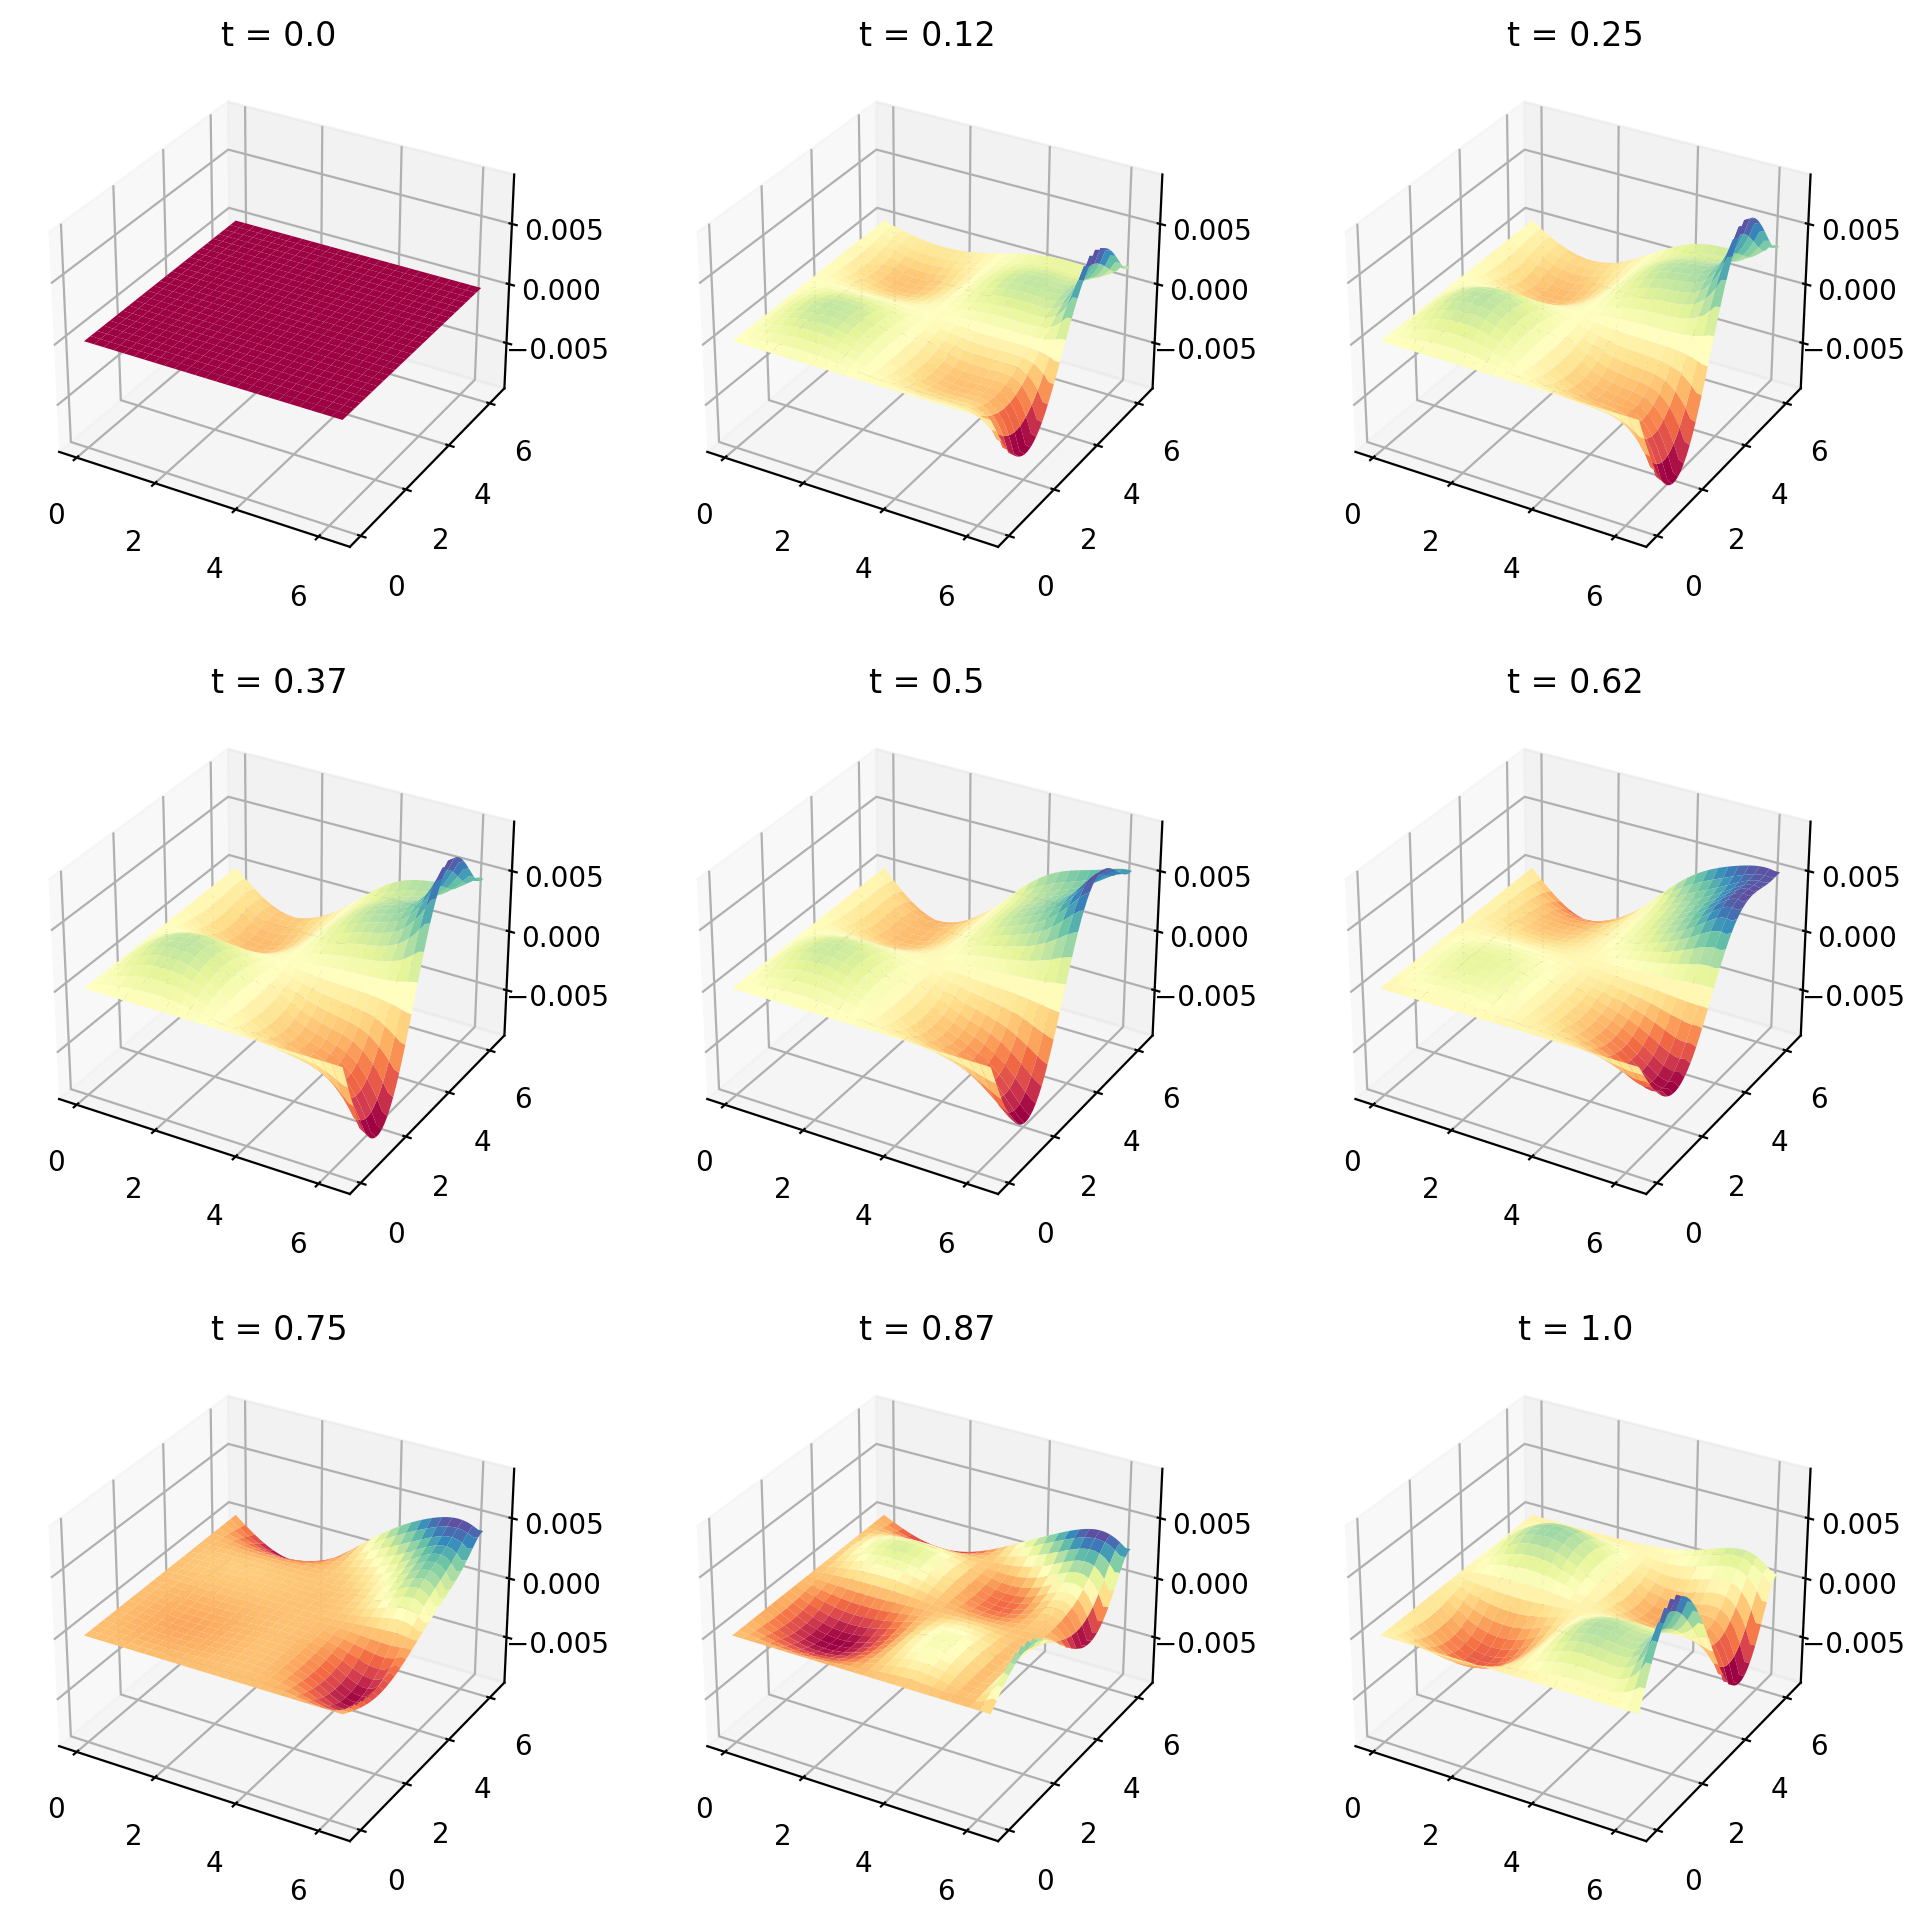

In [18]:
plot_solution(x, y, t, error, 9, zlim=(error.min(), error.max()))